In [ ]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt,sklearn,random
from tqdm import tqdm

In [ ]:
class KMeans:
    def __init__(self, inputfilename, outputfilename, k, max_iterations=100, tol=1e-12):
        random.seed(42)
        self.data = plt.imread(inputfilename)
        self.xdim, self.ydim, _ = self.data.shape
        self.data = self.data.reshape(-1, 3)
        self.inputfilename = inputfilename
        self.outputfilename = outputfilename
        self.length = len(self.data)
        self.k = k
        self.max_iterations = max_iterations
        self.tolerance = tol
        self.mus = self.data[np.random.choice(self.data.shape[0], size=k, replace=False)]
        self.Z_final = None
        self.mus_final = None
        self.compressedImage = None

    def KMeansI(self):
      mus = np.array(self.mus)
      Z = np.zeros((self.length, self.k))
      for _ in tqdm(range(self.max_iterations)):
          mus_old = mus.copy()
          dist = np.linalg.norm(self.data[:, np.newaxis, :] - mus, axis=2)
          cluster = np.argmin(dist, axis=1)
          Z = np.eye(self.k)[cluster]
          num = np.dot(Z.T, self.data)
          dem = np.sum(Z, axis=0)
          dem = dem.reshape(-1, 1)
          mus = np.where(dem != 0, num / dem, mus)

          if np.max(np.abs(mus - mus_old)) < self.tolerance:
              break

      self.mus_final = mus
      self.Z_final = Z
      return mus, Z


    def compressImage(self):
        self.KMeansI()
        modified_image = self.data.copy()
        assignments = np.argmax(self.Z_final, axis=1)
        print("Image Compression in progress:")
        for i in tqdm(range(len(modified_image))):
            modified_image[i] = self.mus_final[assignments[i]]
        self.compressedImage = modified_image.copy()
        plt.imsave(self.outputfilename, self.compressedImage.reshape(self.xdim,self.ydim,3))
    def segmentImage(self):
        self.KMeansI()
        modified_image = self.data.copy()
        assignments = np.argmax(self.Z_final, axis=1)
        print("Image Segmentation in progress:")
        for i in tqdm(range(len(modified_image))):
            modified_image[i] = self.mus_final[assignments[i]]
        self.compressedImage = modified_image.copy()
        plt.imsave(self.outputfilename, self.compressedImage.reshape(self.xdim,self.ydim,3))

In [ ]:
inputfilename = "./drive/MyDrive/BITS/car.jpg"
outputfilename = "./compressed.jpg"
compressor = KMeans(inputfilename,outputfilename,50)

In [ ]:
import os
def get_file_size(file_path):
    try:
        file_size = os.path.getsize(file_path)
        def format_size(size):
            for unit in ['B', 'KB', 'MB', 'GB', 'TB']:
                if size < 1024.0:
                    return f"{size:.2f} {unit}"
                size /= 1024.0

        return format_size(file_size)
    except FileNotFoundError:
        return "File not found"
    except Exception as e:
        return f"Error: {str(e)}"

In [ ]:
compressor.compressImage()

100%|██████████| 100/100 [01:13<00:00,  1.36it/s]


Image Compression in progress:


100%|██████████| 203138/203138 [00:00<00:00, 786193.74it/s]


In [ ]:
print("Initial size of image:",get_file_size(inputfilename))
print("Final size of image after compression:",get_file_size(outputfilename))

Initial size of image: 38.53 KB
Final size of image after compression: 32.42 KB


array([[[ 94, 181, 224],
        [ 95, 182, 225],
        [ 96, 183, 226],
        ...,
        [ 76, 173, 218],
        [ 78, 175, 218],
        [ 78, 175, 217]],

       [[ 91, 178, 223],
        [ 93, 180, 225],
        [ 94, 181, 226],
        ...,
        [ 77, 174, 219],
        [ 78, 175, 218],
        [ 78, 175, 217]],

       [[ 89, 176, 221],
        [ 90, 177, 222],
        [ 91, 180, 224],
        ...,
        [ 78, 174, 222],
        [ 78, 175, 218],
        [ 78, 175, 218]],

       ...,

       [[ 94, 104, 106],
        [ 74,  84,  86],
        [ 46,  56,  58],
        ...,
        [ 50,  60,  62],
        [ 71,  81,  83],
        [ 71,  81,  83]],

       [[ 71,  81,  83],
        [ 63,  73,  75],
        [ 75,  85,  87],
        ...,
        [ 82,  92,  94],
        [ 71,  81,  83],
        [ 70,  80,  82]],

       [[ 99, 109, 111],
        [ 75,  85,  87],
        [ 82,  92,  94],
        ...,
        [ 40,  50,  52],
        [ 81,  89,  92],
        [ 82,  90,  93]]], dtype=uint8)
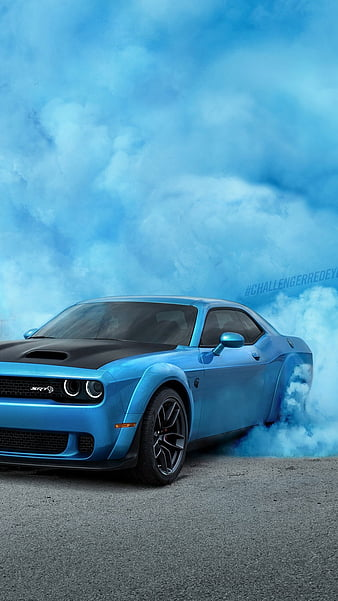

In [ ]:
plt.imread(inputfilename)

array([[[ 93, 181, 221],
        [ 94, 182, 222],
        [ 94, 182, 222],
        ...,
        [ 75, 170, 216],
        [ 84, 175, 222],
        [ 84, 175, 220]],

       [[ 91, 179, 219],
        [ 92, 180, 220],
        [ 93, 181, 221],
        ...,
        [ 78, 173, 219],
        [ 84, 175, 222],
        [ 84, 175, 220]],

       [[ 88, 177, 217],
        [ 89, 178, 218],
        [ 91, 180, 220],
        ...,
        [ 80, 175, 221],
        [ 84, 175, 222],
        [ 84, 175, 220]],

       ...,

       [[101, 112, 114],
        [ 72,  83,  85],
        [ 38,  49,  51],
        ...,
        [ 25,  36,  38],
        [ 68,  79,  85],
        [ 67,  78,  84]],

       [[ 69,  80,  82],
        [ 51,  62,  64],
        [ 69,  80,  82],
        ...,
        [ 80,  91,  93],
        [ 72,  83,  89],
        [ 71,  82,  88]],

       [[ 93, 104, 106],
        [ 69,  80,  82],
        [ 76,  87,  89],
        ...,
        [ 41,  52,  54],
        [ 78,  89,  95],
        [ 78,  89,  95]]], dtype=uint8)
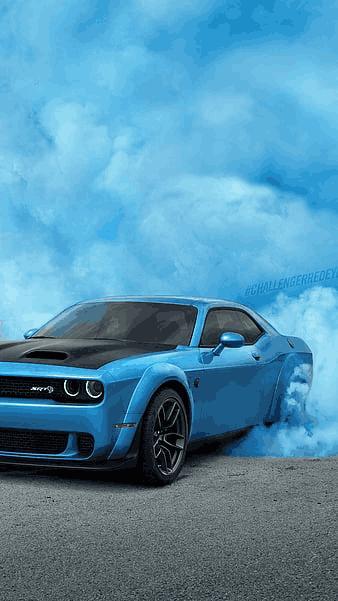

In [ ]:
plt.imread(outputfilename)

  7%|▋         | 7/100 [00:00<00:03, 26.64it/s]


Image Segmentation in progress:


 27%|██▋       | 27/100 [00:01<00:04, 18.20it/s]


Image Segmentation in progress:


 55%|█████▌    | 55/100 [00:06<00:04,  9.11it/s]


Image Segmentation in progress:


 99%|█████████▉| 99/100 [00:25<00:00,  3.82it/s]


Image Segmentation in progress:


100%|██████████| 203138/203138 [00:00<00:00, 745212.03it/s]


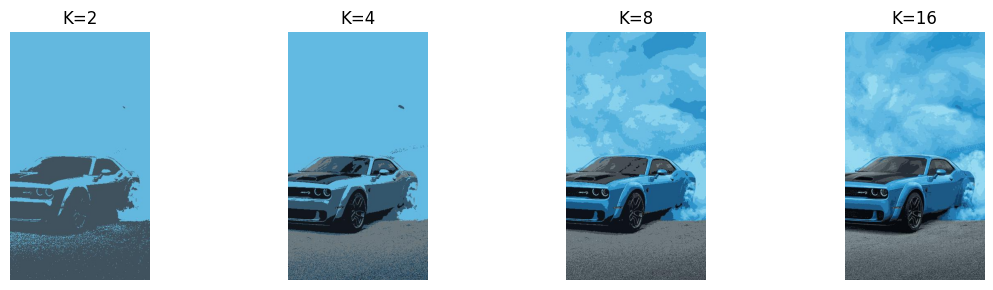

In [ ]:
inputfilename = "./drive/MyDrive/BITS/car.jpg"
outputfilename = "./segmented"
k_values = [2, 4, 8, 16]
for k in k_values:
    compressor = KMeans(inputfilename, f"{outputfilename}_{k}.jpg", k)
    compressor.segmentImage()
num_rows = 1
num_cols = len(k_values)
plt.figure(figsize=(3*num_cols, 3*num_rows))
for i, k in enumerate(k_values):
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(plt.imread(f"{outputfilename}_{k}.jpg"))
    plt.title(f"K={k}")
    plt.axis('off')
plt.tight_layout()
plt.show()